In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import *
import importlib
from common import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
X = flamingo

In [4]:
DWT_result, factors, strength = DWT_quant(X, log = True)

38500
bits: 151744, strength: 0.0
bits: 75863, strength: 1.0
bits: 40980, strength: 2.6180339999999998
bits: 44755, strength: 2.328528010791047
bits: 21377, strength: 5.2360680251559995
bits: 40980, strength: 2.6180339999999998
bits: 30742, strength: 3.6180339844527363
bits: 50071, strength: 2.000000025156
bits: 37775, strength: 2.904401393963929
bits: 37308, strength: 2.95292831511042
bits: 38646, strength: 2.8263648153819743
bits: 39594, strength: 2.746789527153783
bits: 38533, strength: 2.835138805722409
bits: 38375, strength: 2.852724565971576
bits: 38477, strength: 2.841855968221742
bits: 38523, strength: 2.8397012402948287
bits: 38501, strength: 2.8407786042582854
bits: 38501, strength: 2.8407786463118088
bits: 38501, strength: 2.8407786883653325
bits: 38493, strength: 2.841190172642966
bits: 38501, strength: 2.840935861368923
bits: 38501, strength: 2.841032999629024
bits: 38500, strength: 2.8410930343764673
bits: 38500, strength: 2.8411301378915685
bits: 38500, strength: 2.84111

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38283
Bits for huffman table = 1424
38.283
Generating huffcode and ehuf using custom tables
Decoding rows
Error: 16.22


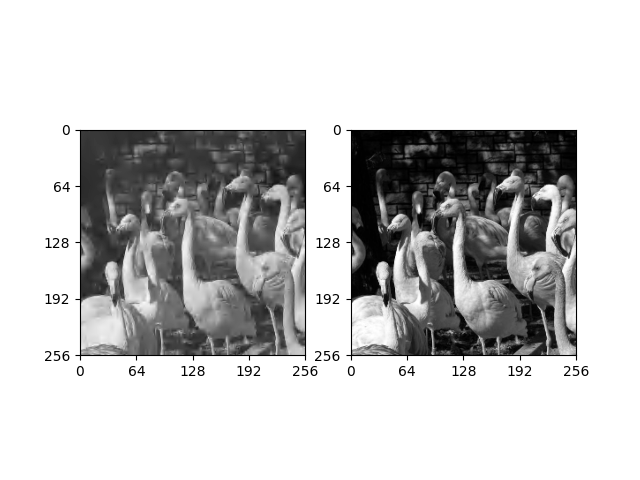

In [5]:
vlc, header = DWT_huffenc(DWT_result, dcbits=12, opthuff=True)
print(np.sum(vlc[:, 1])/1000)

DWT_decoded = DWT_huffdec(vlc, hufftab=header)


DWT_final = quantdwt2(DWT_decoded, factors, strength=strength)
reconstructed = inverse_DWT(DWT_final, N, g1, g2)


fig, axs = plt.subplots(1, 2)
plot_image(reconstructed, ax=axs[0])
plot_image(X, ax=axs[1])

# size_of_img = np.sum(vlc[:, 1])
# axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')


print("Error:", np.std(reconstructed-X).round(2))

In [ ]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, strength, N=7, hufftab=header)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


In [3]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)


Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 68264
Bits for huffman table = 1424
68264
Generating huffcode and ehuf using custom tables
Decoding rows
12.670574791143471


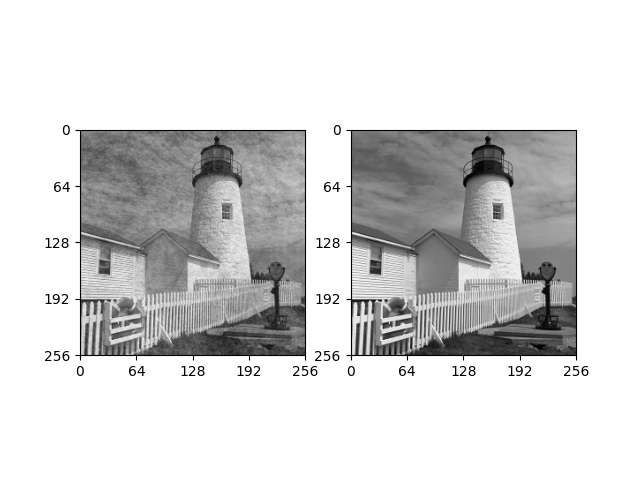

In [ ]:
from PCA_DWT import *

Y = DWT(lighthouse, N)
Yq = quant1(Y, 10, 0.5)
# ratios = get_ratios(Y, N, g1, g2)
# factors = get_factors(Y, N)
# Yq, _ = quantdwt(Y, 10*np.ones((3, N+1))*ratios, factors, 0)
pca, result = PCA_DWT(Yq)
result_clipped = np.clip(result, -1023, 1023)
encoded, header = PCA_huffenc(result_clipped, opthuff=True)

print(np.sum(encoded[:, 1]))

decoded = PCA_huffdec(encoded, header)
recon = inverse_PCA_DWT(pca, decoded)

recon = quant2(Yq, 10, 0.5)
Z = inverse_DWT(recon, N, g1, g2)

fig, axs = plt.subplots(1, 2)
plot_image(Z, ax=axs[0])
plot_image(lighthouse, ax=axs[1])

print(np.std(Z-lighthouse))

In [ ]:
bpp(lighthouse)*256*256

493398.1567807872

38500
bits: 151744, strength: 0.0
bits: 75863, strength: 1.0
bits: 40980, strength: 2.6180339999999998
bits: 44755, strength: 2.328528010791047
bits: 21377, strength: 5.2360680251559995
bits: 40980, strength: 2.6180339999999998
bits: 30742, strength: 3.6180339844527363
bits: 50071, strength: 2.000000025156
bits: 37775, strength: 2.904401393963929
bits: 37308, strength: 2.95292831511042
bits: 38646, strength: 2.8263648153819743
bits: 39594, strength: 2.746789527153783
bits: 38533, strength: 2.835138805722409
bits: 38375, strength: 2.852724565971576
bits: 38477, strength: 2.841855968221742
bits: 38523, strength: 2.8397012402948287
bits: 38501, strength: 2.8407786042582854
bits: 38501, strength: 2.8407786463118088
bits: 38501, strength: 2.8407786883653325
bits: 38493, strength: 2.841190172642966
bits: 38501, strength: 2.840935861368923
bits: 38501, strength: 2.841032999629024
bits: 38500, strength: 2.8410930343764673
bits: 38500, strength: 2.8411301378915685
bits: 38500, strength: 2.84111

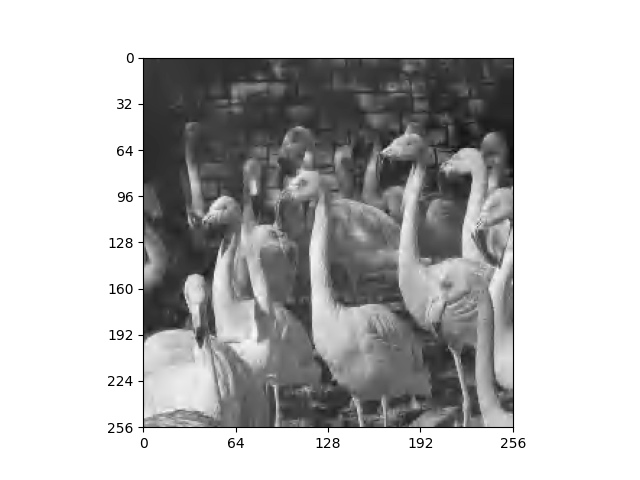

In [4]:
from competition.encoder import encode
from competition.decoder import decode

vlc, header = encode(flamingo)
print(np.sum(vlc[:, 1]))

decoded = decode(vlc, header)


fig, ax = plt.subplots()
plot_image(decoded, ax=ax)

In [9]:
np.std(decoded-flamingo)

14.472334175715513

(256, 256)


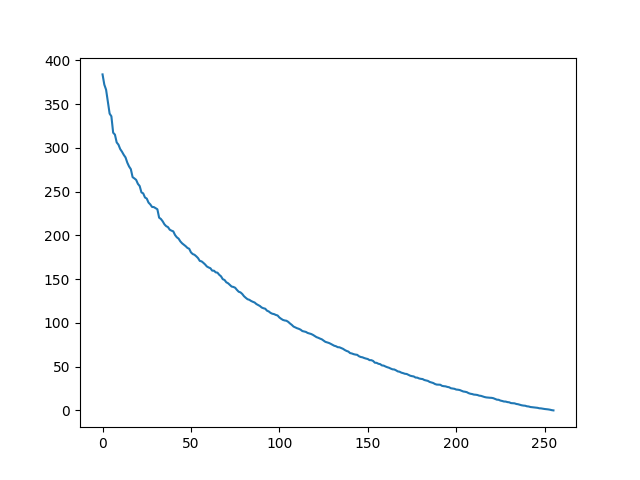

In [3]:
u, s, vh = np.linalg.svd(DWT(flamingo, N), full_matrices=False)
print(u.shape)
plt.figure()
plt.plot(s)
plt.show()

(256, 50) (50,) (50, 256)


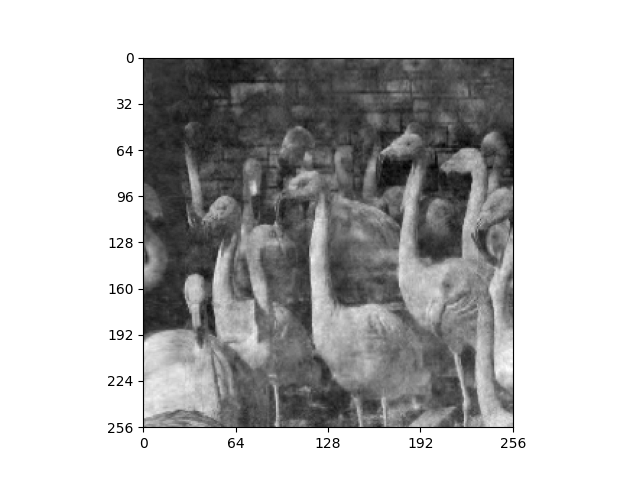

In [9]:
svd_result = SVD(DWT(flamingo, N))
# vlc, header = PCA_huffenc(svd_result, opthuff=True)
DWT_recons = inverse_SVD(svd_result)
image_recons = inverse_DWT(DWT_recons, N, g1, g2)
fig, ax = plt.subplots()
plot_image(image_recons, ax=ax)
